Удельная энергия связи: 7.505599456594282
Масса атома: 238.0672263331514
Радиус атома: 7.436585321689351
Устойчивость к бета-распаду: True
Возможность деления на 2 одинаковых четно-четных осколка: True


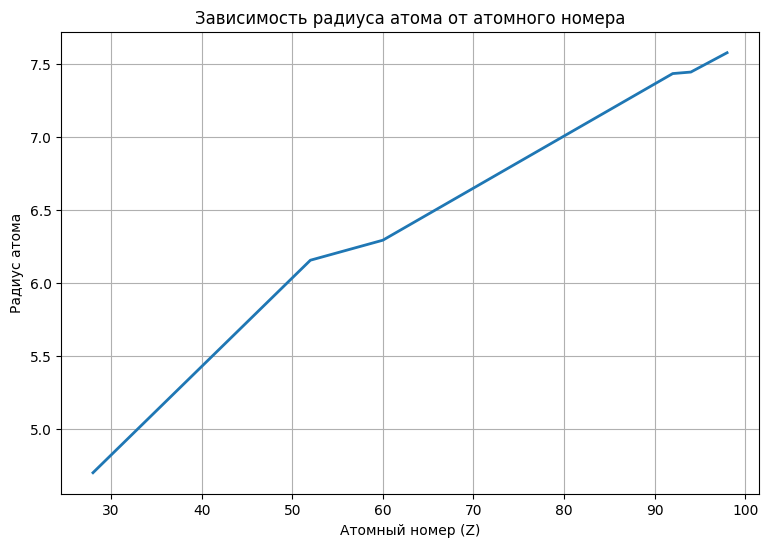

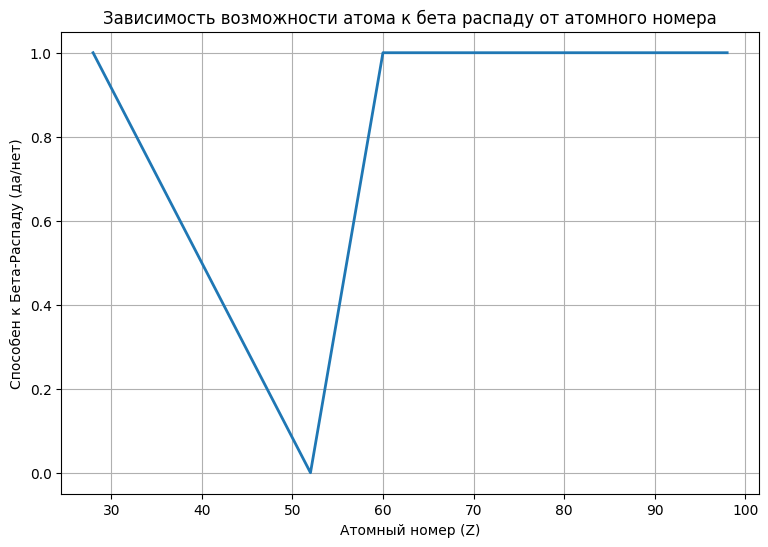

In [20]:
import matplotlib.pyplot as plt

class Atom:
    def __init__(self, symbol, mass_number, atomic_number):
        self.symbol = symbol
        self.mass_number = mass_number
        self.atomic_number = atomic_number

    def binding_energy(self):
        # Реализация вычисления удельной энергии связи для данного атома
        # используя формулу Вайзекера
        a1 = 15.67
        a2 = 17.8
        a3 = 0.71
        a4 = 23.7
        if ((self.mass_number - self.atomic_number) % 2 == 0 and self.atomic_number % 2 == 0):
          a5 = 34
        elif ((self.mass_number - self.atomic_number) % 2 != 0 and self.atomic_number % 2 != 0):
          a5 = -34
        else:
          a5 = 0


        binding_energy = (a1 * self.mass_number - a2 * self.mass_number ** (2/3) - a3 * (self.atomic_number ** 2) / self.mass_number ** (1/3)
        - a4 * (self.mass_number - 2 * self.atomic_number) ** 2 / self.mass_number + a5 * self.mass_number ** (-3/4)) / self.mass_number

        return binding_energy

    def mass(self):
      delta_MH1 = 7.289 #дефект массы водорода (Мэв)
      delta_mn = 8.071 #дефект массы нейтрона (Мэв)
        #используя Gя =Z*delta_MH1 + (A-Z)*delta_mn – delta_M(A,Z) получим:
      delta_M = (self.atomic_number*delta_MH1 + (self.mass_number-self.atomic_number)*delta_mn-(self.binding_energy() * self.mass_number))
      M = (delta_M + 931.5*self.mass_number) / 931.5
      return M

    def radius(self):
        # Реализация вычисления радиуса атома для данного атома
        radius = 1.2 * (self.mass_number ** (1/3))
        return radius

    def is_stable(self):
        # Реализация проверки, является ли изотоп данного атома устойчивым к бета-распаду
      k1 = self.mass() * 1000
      self.atomic_number += 1
      k2 = self.mass() * 1000
      if int(k1) > int(k2):
        self.atomic_number -= 1
        return False
      else:
        self.atomic_number -= 1
        return True

    def can_divide(self):
        # Реализация проверки, возможно ли деление данного изотопа на 2 одинаковых четно-четных осколка
        if self.mass_number % 2 == 1:
            return False

        if self.atomic_number % 2 == 1:
            return False

        return True


# Пример использования класса Atom
atom = Atom("U", 238, 92)

# Вычисление удельной энергии связи
binding_energy = atom.binding_energy()
print("Удельная энергия связи:", binding_energy)

# Вычисление массы атома
mass = atom.mass()
print("Масса атома:", mass)

# Вычисление радиуса атома
radius = atom.radius()
print("Радиус атома:", radius)

# Проверка устойчивости к бета-распаду
is_stable = atom.is_stable()
print("Устойчивость к бета-распаду:", is_stable)

# Проверка возможности деления на 2 одинаковых четно-четных осколка
can_divide = atom.can_divide()
print("Возможность деления на 2 одинаковых четно-четных осколка:", can_divide)

# Построение графика радиуса атома в зависимости от атомного номера
atomic_numbers = [28, 52, 60, 92, 94, 98]

Pu = Atom("Pu", 239, 94)
Nd = Atom("Nd", 144.24, 60)
U = Atom("U", 238, 92)
Cf = Atom("Cf", 252, 98)
Te = Atom("Te", 135, 52)
Ni = Atom("Ni", 60, 28)
atomic_radius = [Ni.radius(), Te.radius(), Nd.radius(), U.radius(), Pu.radius(), Cf.radius()]


plt.figure(figsize=[9,6])
plt.plot(atomic_numbers, atomic_radius, linewidth=2)
plt.xlabel('Атомный номер (Z)')
plt.ylabel('Радиус атома')
plt.title('Зависимость радиуса атома от атомного номера')
plt.grid(True)
plt.show()
# Построение графика возможности бета распада в зависимости от атомного номера
is_stables = [Ni.is_stable(), Te.is_stable(), Nd.is_stable(), U.is_stable(), Pu.is_stable(), Cf.is_stable()]
plt.figure(figsize=[9,6])
plt.plot(atomic_numbers, is_stables, linewidth=2)
plt.xlabel('Атомный номер (Z)')
plt.ylabel('Способен к Бета-Распаду (да/нет)')
plt.title('Зависимость возможности атома к бета распаду от атомного номера')
plt.grid(True)
plt.show()

